In [1]:
import gensim
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        print(labels)
        plt.scatter(x, y, c=color, alpha=a, label=labels)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
            plt.legend(loc=4)
            plt.title(title)
            plt.grid(True)
            if filename:
                plt.savefig('templates/'+filename, format='svg', dpi=300)

def keywords(value):
    model_gn = gensim.models.KeyedVectors.load_word2vec_format('word2vec_us_500.bin', binary=True)
    value = value.split(' ')
    keys = [str(x).lower() for x in value ]
    embedding_clusters = []
    word_clusters = []
 
    
    embeddings = []
    words = []

    for similar_word, _ in model_gn.most_similar(keys, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)



    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
    
    
        # plt.show()


    # plt.savefig('similar_words.svg',format='svg') 
    
    return tsne_plot_similar_words('Knowledge Graph', keys, embeddings_en_2d, word_clusters, 0.7, 'Knowledge_Graph.svg')
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['python', 'business_analytics', 'losangeles']


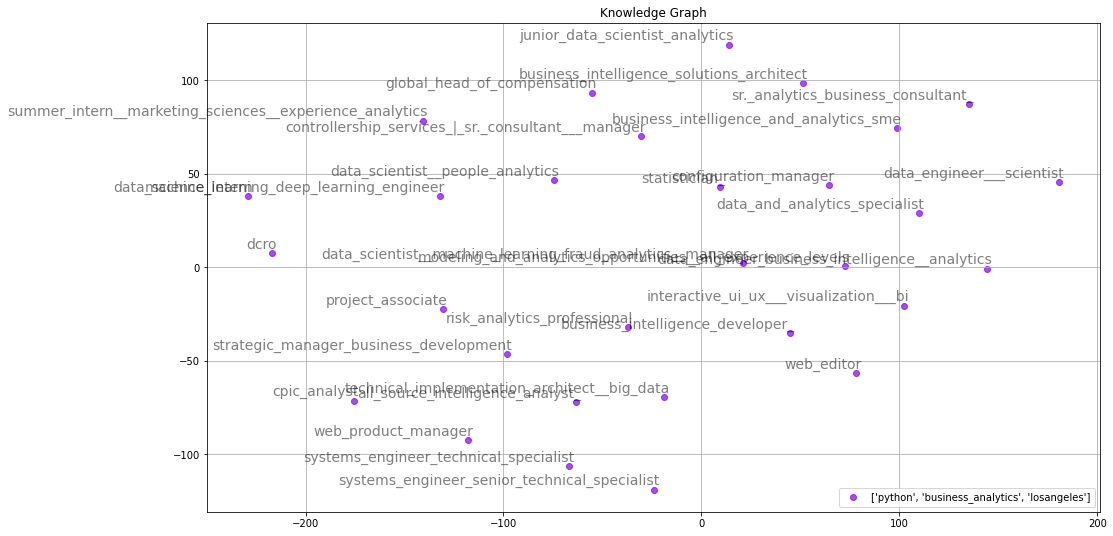

In [7]:
keywords('python business_analytics losangeles')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


['python', 'business_analytics']


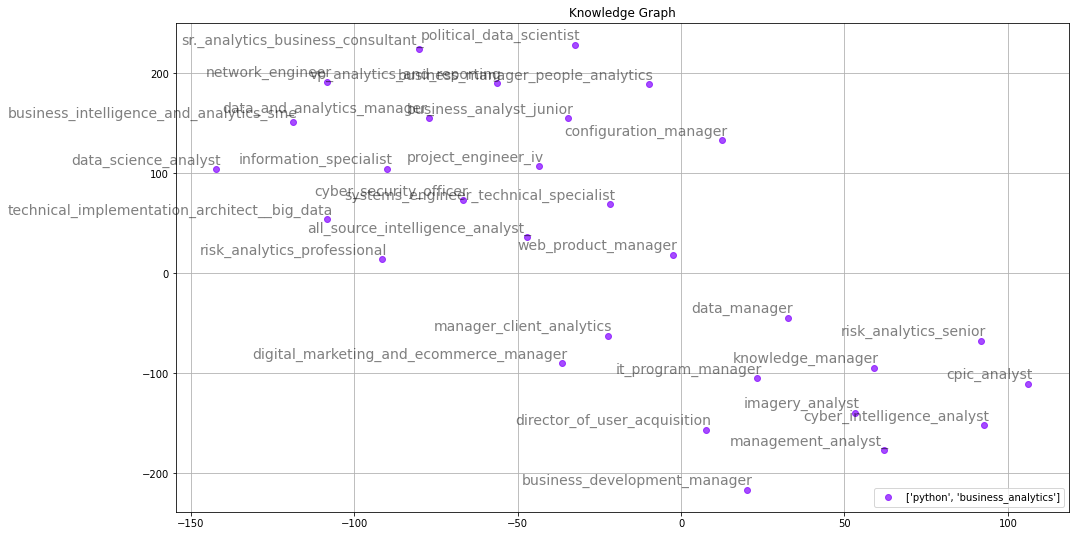

In [5]:
keywords('python business_analytics')